# <b>hist</b>

The `hist` function allows histogram visualizing DataFrame data.  At a minimum, the `hist` function requires the following keywords:
<ul>
<li> `df`: a pandas DataFrame</li>
<li> `x`: the name of the DataFrame column containing the x-axis data (except with 2D image data, then optional)</li>
</ul>

The y-axis will display the histogram counts for the specified data set.  

Other optional keywords for this function are described in <a href="https://endangeredoxen.github.io/fivecentplots/keyword.html">Keyword Arguments</a>.

## Setup

### Imports

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import fivecentplots as fcp
import pandas as pd
import numpy as np
import os, sys, pdb
osjoin = os.path.join
db = pdb.set_trace

### Sample data

In [2]:
df = pd.read_csv(osjoin(os.path.dirname(fcp.__file__), 'tests', 'fake_data_box.csv'))
df.head()

Batch  Sample    Region  Value            ID
0    101       1  Alpha123    3.5     ID701223A
1    101       1  Alpha123    2.1  ID7700-1222B
2    101       1  Alpha123    3.3     ID701223A
3    101       1  Alpha123    3.2  ID7700-1222B
4    101       1  Alpha123    4.0     ID701223A

### Set theme

(Only needs to be run once)

In [3]:
#fcp.set_theme('gray')
#fcp.set_theme('white')

### Other

In [4]:
SHOW = False

## Simple histogram

### Vertical bars

A simple histogram with default bin size of 20:

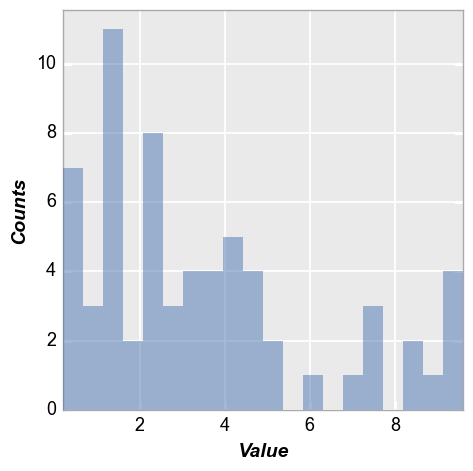

In [5]:
fcp.hist(df=df, x='Value', show=SHOW)

### Horizontal bars

Same data as above but with histogram bars oriented horizontally:

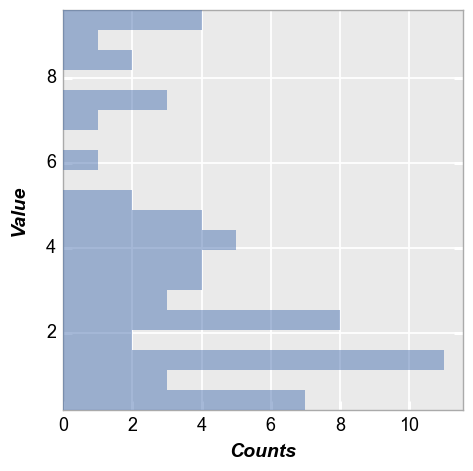

In [6]:
fcp.hist(df=df, x='Value', show=SHOW, horizontal=True)

## Legend

Add a legend:

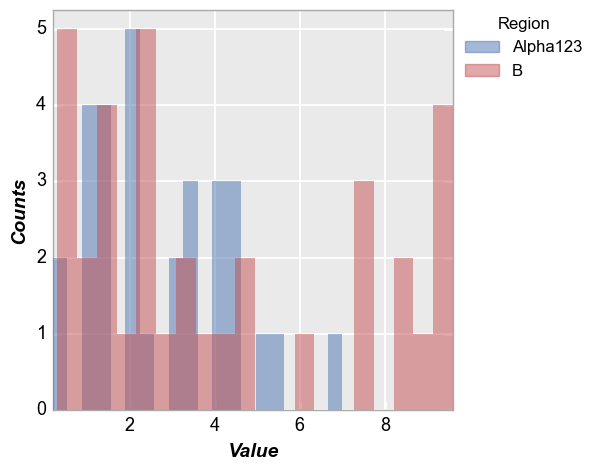

In [7]:
fcp.hist(df=df, x='Value', show=SHOW, legend='Region')

## Kernal density estimator

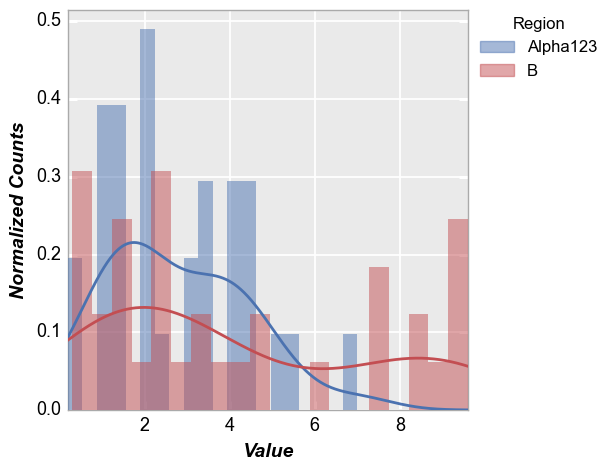

In [8]:
fcp.hist(df=df, x='Value', show=SHOW, legend='Region', kde=True, kde_width=2)

## Row/column plot

Make multiple subplots with different row/column values:

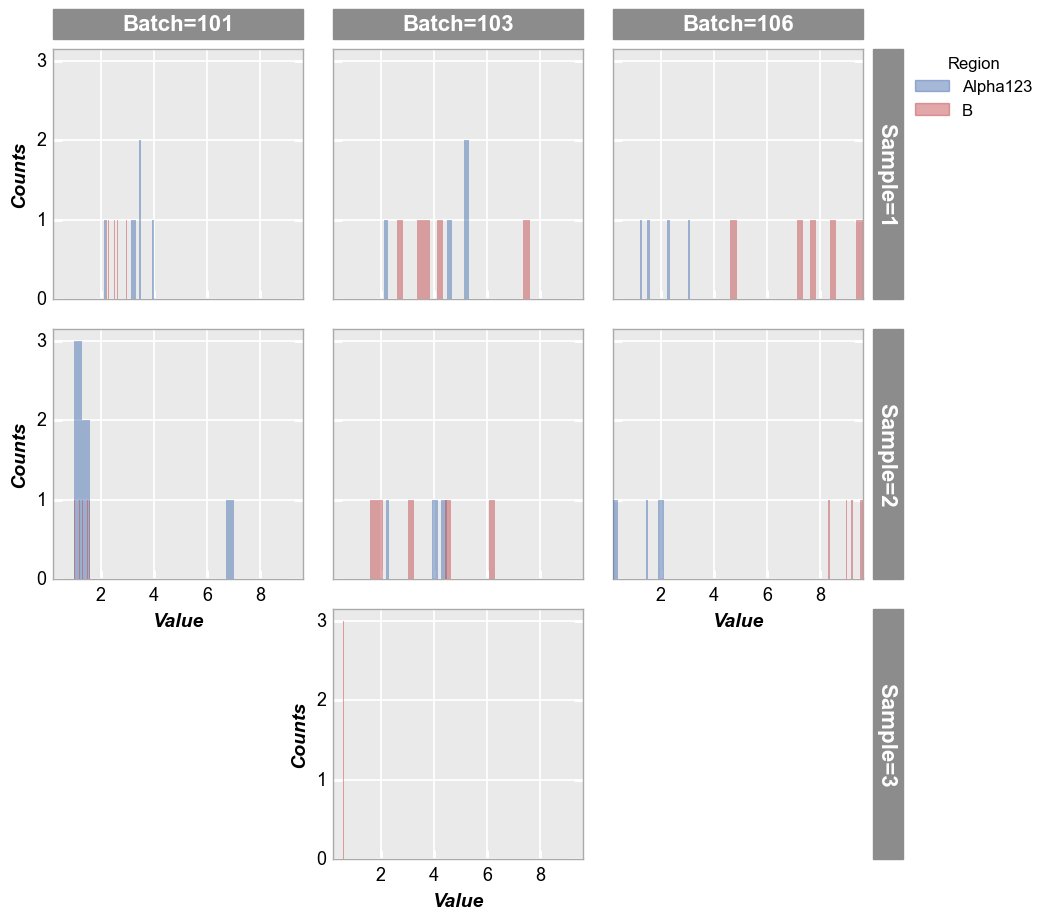

In [9]:
fcp.hist(df=df, x='Value', show=SHOW, legend='Region', col='Batch', row='Sample', ax_size=[250, 250])

## Wrap plot

### By column values

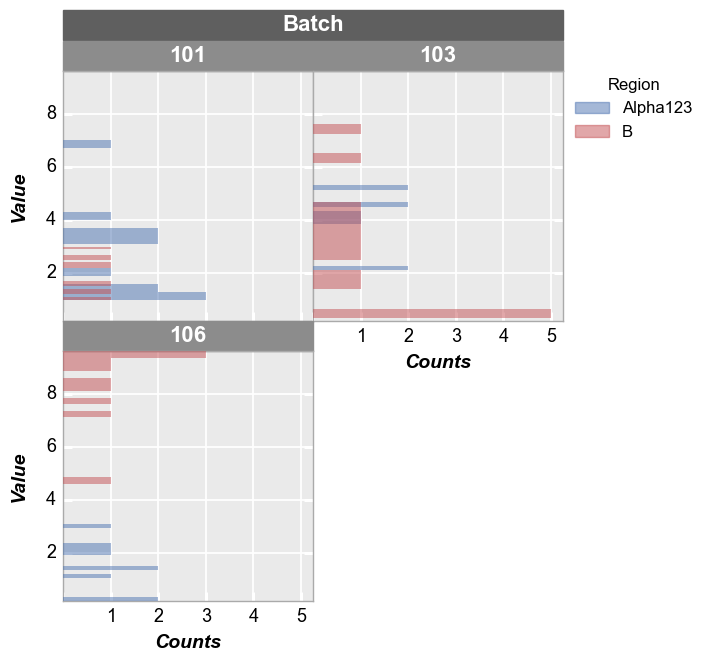

In [10]:
fcp.hist(df=df, x='Value', show=SHOW, legend='Region', wrap='Batch', ax_size=[250, 250], horizontal=True) 

### By column names

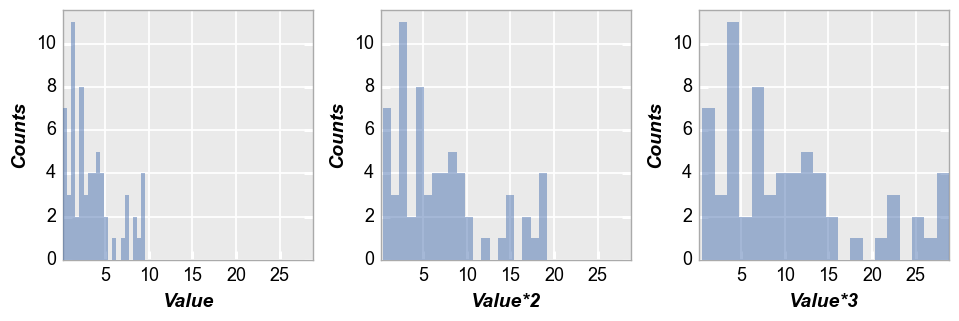

In [11]:
df['Value*2'] = 2*df['Value']
df['Value*3'] = 3*df['Value']
fcp.hist(df=df, x=['Value', 'Value*2', 'Value*3'], wrap='x', show=SHOW, ncol=3, ax_size=[250, 250])

## Images

<b>fivecentplots</b> ``hist`` plots can also be used for histograms of pixel values from images, with and without color plane separation

### Mono
Consider a light blue color patch.  First we ignore any CFA and just consider the blue color channel from the RGB image:

<img src="https://imgs.michaels.com/MAM/assets/1/D730994AF28E498A909A1002BBF38107/img/16F309E5F1CF4742B4AACD8E0CCF08E0/D203087S_1.jpg?fit=inside|1024:1024" width="200">

In [12]:
# Read an image and convert to raw using only the blue color channel
import imageio
url = 'https://imgs.michaels.com/MAM/assets/1/D730994AF28E498A909A1002BBF38107/img/16F309E5F1CF4742B4AACD8E0CCF08E0/D203087S_1.jpg?fit=inside|1024:1024'
imgr = imageio.imread(url)
img = fcp.utilities.rgb2bayer(imgr, 'bbbb')
img

0     1     2     3     4     5     6     7     8     9     ...  1014  \
0      247   247   248   251   250   248   249   251   250   251  ...   243   
1      249   251   252   252   252   251   252   254   251   251  ...   237   
2      249   249   250   251   251   252   253   255   254   253  ...   245   
3      247   246   249   250   250   249   249   251   253   254  ...   243   
4      251   250   250   250   250   249   249   249   250   251  ...   236   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
1019   247   247   248   248   248   247   247   247   247   245  ...   239   
1020   251   251   251   251   251   250   250   249   249   247  ...   237   
1021   251   251   251   251   251   250   250   249   251   248  ...   239   
1022   249   249   249   248   248   248   249   249   250   248  ...   241   
1023   249   249   248   248   249   250   250   251   251   248  ...   241   

      1015  1016  1017  1018  1019  1020  1021  1022  1023  
0      243   242   240   241   243   244   241   241   243  
1      237   243   242   241   241   240   238   237   237  
2      245   241   242   242   240   239   239   238   236  
3      242   241   244   245   243   244   246   246   244  
4      234   238   241   241   240   240   243   243   241  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...  
1019   239   242   242   242   242   241   241   241   241  
1020   237   238   237   237   237   237   236   236   236  
1021   239   239   239   239   240   240   240   241   241  
1022   242   243   243   243   243   244   244   244   244  
1023   242   238   238   238   238   237   237   237   237  

[1024 rows x 1024 columns]

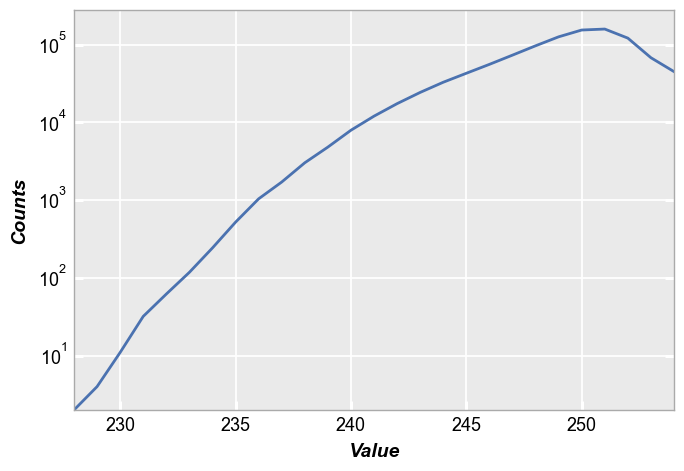

In [13]:
fcp.hist(img, markers=False, ax_scale='logy', ax_size=[600, 400], line_width=2, show=SHOW)

Next we convert the RGB into a Bayer-like image with RGGB CFA and we can see the histogram of the discrete color channels:

In [14]:
img = fcp.utilities.rgb2bayer(imgr, 'rggb')
img

0     1     2     3     4     5     6     7     8     9     ...  1014  \
0      176   217   177   219   177   216   176   219   177   219  ...   159   
1      219   251   220   252   220   251   220   254   219   251  ...   195   
2      176   217   177   219   178   217   178   220   179   221  ...   161   
3      215   246   214   250   215   249   214   251   218   254  ...   201   
4      176   215   175   215   175   214   174   214   175   216  ...   152   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
1019   212   247   213   248   213   247   212   247   212   245  ...   197   
1020   176   216   176   216   176   215   175   214   174   212  ...   153   
1021   216   251   216   251   216   250   215   249   216   248  ...   197   
1022   174   214   174   213   173   213   174   214   175   213  ...   157   
1023   214   249   213   248   214   250   215   251   216   248  ...   199   

      1015  1016  1017  1018  1019  1020  1021  1022  1023  
0      201   158   198   157   201   160   199   157   201  
1      237   201   242   199   241   198   238   195   237  
2      203   157   200   158   198   155   197   154   194  
3      242   199   244   203   243   202   246   204   244  
4      192   154   199   157   198   156   201   159   199  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...  
1019   239   200   242   200   242   199   241   199   241  
1020   195   154   195   153   195   153   194   152   194  
1021   239   197   239   197   240   198   240   199   241  
1022   200   159   201   159   201   160   202   160   202  
1023   242   196   238   196   238   195   237   195   237  

[1024 rows x 1024 columns]

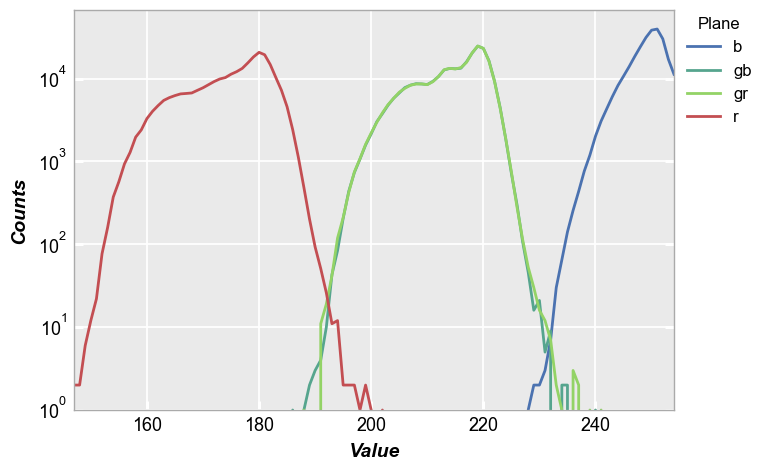

In [15]:
fcp.hist(img, markers=False, ax_scale='logy', ax_size=[600, 400], show=SHOW, legend='Plane', cfa='rggb', line_width=2, colors=fcp.BAYER)